Similar to generating a frequency comb, we want to add a large AC signal off resonance (~ 100 kHz) to help the electrons on the sphere come off.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import welch

In [4]:
def get_ff(ff_want, ff_samp):
    ff_want = np.asarray(ff_want)
    ff = np.zeros_like(ff_want)
    for i, f_want in enumerate(ff_want):
          ff[i] = ff_samp[np.argmin(np.abs(ff_samp - f_want))]
    return ff

In [9]:
def get_signal(tt, ff, amp=None, phase=None):
    sig = np.zeros_like(tt)

    if amp is None:
        amp = np.ones_like(ff)
    if phase is None:
        phase = np.zeros_like(ff)

    for i, f in enumerate(ff):
            sig += amp[i]*np.sin(2 * np.pi * f * tt + phase[i])
            
    return sig

In [2]:
rep_rate = 100
nsample = 8000

In [3]:
tt = np.linspace(0, 1 / rep_rate, nsample)
delta_t = tt[1] - tt[0]

# FFT sample frequcies based on our choice of time resolution
ff_samp = fftfreq(nsample, delta_t)

In [22]:
amp_drive, amp_add = 1, 5
f_drive, f_add = 69000, 200000
ff_real = get_ff(np.asarray([f_drive, f_add]), ff_samp)

In [23]:
# No need to optimize phase if the add signal is much larger
sig = get_signal(tt, ff_real, [amp_drive, amp_add])

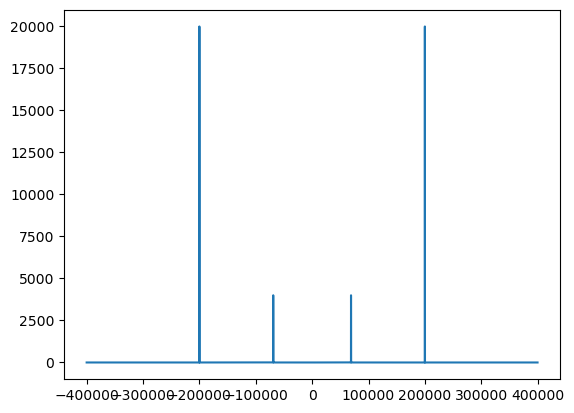

In [24]:
sp = fftshift(fft(sig))
freq = fftshift(fftfreq(tt.size, delta_t))

plt.plot(freq, np.abs(sp))

In [26]:
file_name = 'drive_signal_charging_69khz1v_200khz5v.npz'
np.savez(file_name, sig=sig, tt=tt, ff=ff_real)

In [28]:
ff_real

array([ 68991, 199975])